# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# some parameters
model_name = 'MNIST'

# 1.0 Import the Dataset

In [5]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

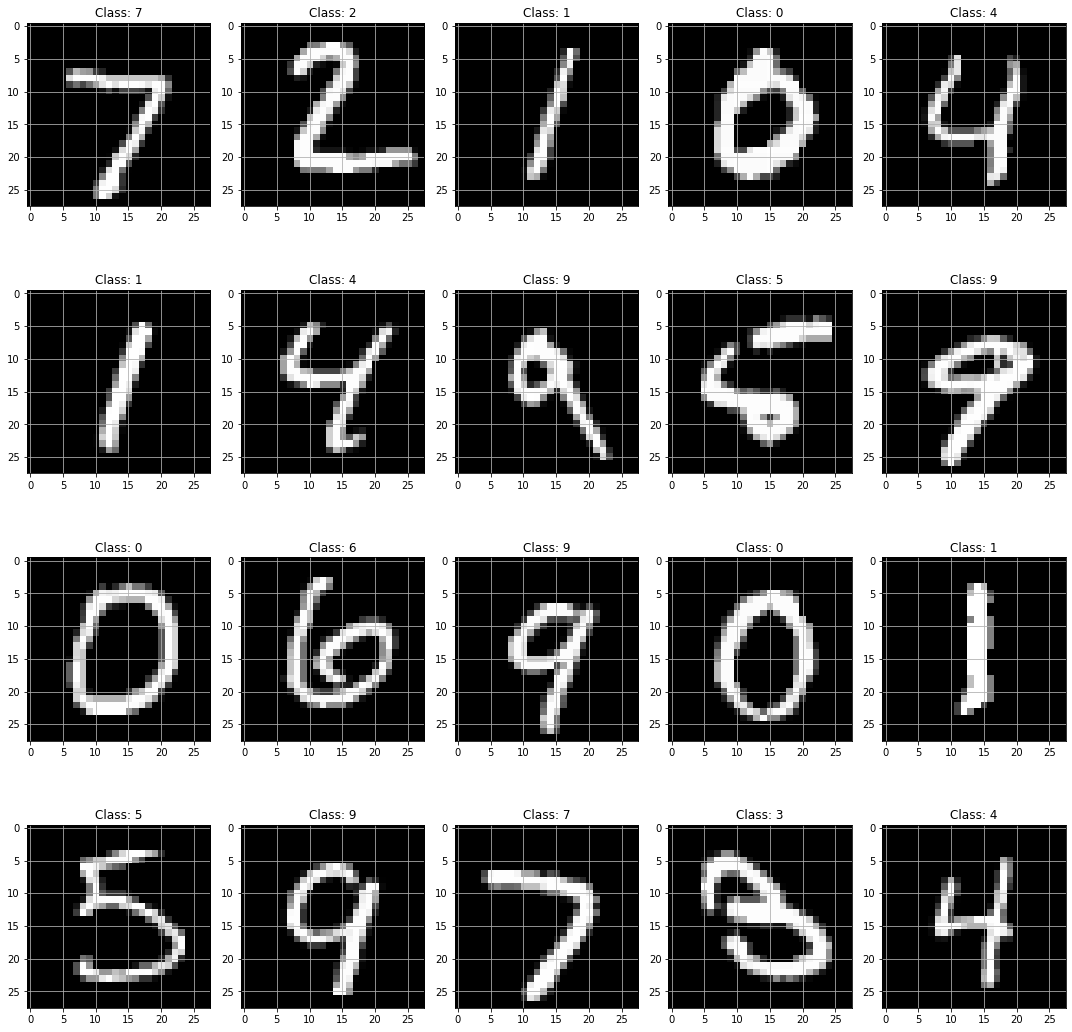

In [6]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   832         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 22, 64)   18496       batch_normalization[0][0]        
__________________________________________________________________________________

# 3.0 Train the Model

In [8]:
dataset_train, dataset_val = dataset.get_tf_data() 

In [13]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------
Epoch 1/50
118/118 [==============================] - 18s 140ms/step - loss: 0.5325 - Efficient_CapsNet_loss: 0.4718 - Generator_loss: 0.1549 - Efficient_CapsNet_accuracy: 0.5095 - val_loss: 0.3354 - val_Efficient_CapsNet_loss: 0.3087 - val_Generator_loss: 0.0679 - val_Efficient_CapsNet_accuracy: 0.6457

Epoch 00001: val_Efficient_CapsNet_accuracy improved from -inf to 0.64570, saving model to bin/efficient_capsnetMNIST_new_train.h5
Epoch 2/50
118/118 [==============================] - 16s 134ms/step - loss: 0.1009 - Efficient_CapsNet_loss: 0.0779 - Generator_loss: 0.0588 - Efficient_CapsNet_accuracy: 0.9385 - val_loss: 0.1453 - val_Efficient_CapsNet_loss: 0.1212 - val_Generator_loss: 0.0616 - val_Efficient_CapsNet_accuracy: 0.8623

Epoch 00002: val_Efficient_CapsNet_accuracy improved from 0.64570 to 0.86230, saving model to bin/efficient_capsnetMNIST_new_train.h5
Epoch 3/50
118/118 [==============================]

In [ ]:
# history_dict = json.load(open(your_history_path, 'r'))

In [ ]:
plotHistory(history)